## Генерация признаков

In [45]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [46]:
PREP_DATASET_PATH = r'training_project_data_prep.csv'

In [47]:
df = pd.read_csv(PREP_DATASET_PATH)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_4_2,PAY_4_3,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3
0,150000.0,2,2,2,24,1,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,0,1,0,0,1,0,0,1,0,0
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,0,0,0,1,0,0,0,1,0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,1,0,0,0,1,0,0,1,0,0


In [48]:
train, test = train_test_split(df,
                               test_size=0.2,
                               shuffle=True,
                               stratify=df['NEXT_MONTH_DEFAULT'],
                               random_state=12)

_______________
Генерация новых признаков
    1. Категориальные признаки
        * порядковые числа
        * pd.get_dummies
        * Feature Encoding
        * Target Encoding
    2. Вещественные признаки
        * Feature discretization
        * Feature binarization
    3. Генерация фичей исходя из логики
    4. Автоматическая генерация фичей

In [49]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_4_2,PAY_4_3,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,168182.000000,1.606800,1.860400,1.55610,35.39600,0.059200,-0.014600,-0.040800,-0.088100,-0.128900,...,0.106400,0.011700,0.339800,0.5601,0.089400,0.010700,0.358500,0.53940,0.092700,0.009400
std,130118.668771,0.488485,0.790047,0.51815,9.19536,0.946248,1.008706,0.984699,0.926944,0.881568,...,0.308364,0.107537,0.473665,0.4964,0.285335,0.102891,0.479584,0.49847,0.290026,0.096502
min,10000.000000,1.000000,1.000000,1.00000,21.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.00000,28.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.00000,34.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.00000,41.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.0000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.00000,75.00000,3.000000,3.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Категориальные признаки

1=женат/замужен, 2=не женат/не замужем, 3=прочее

In [50]:
train['MARRIAGE'].value_counts()

2    4261
1    3649
3      90
Name: MARRIAGE, dtype: int64

In [51]:
def marriage_to_default():
    train, test = train_test_split(df,
                                   test_size=0.2,
                                   shuffle=True,
                                   stratify=df['NEXT_MONTH_DEFAULT'],
                                   random_state=12)
    train.replace({
        'MARRIAGE': {
            2: 'не женат/не замужем', 
            1: 'женат/замужен', 
            3: 'прочее'
        }
    }, inplace=True)

    test.replace({
        'MARRIAGE': {
            2: 'не женат/не замужем', 
            1: 'женат/замужен', 
            3: 'прочее'
        }
    }, inplace=True)
    
    return train, test

In [52]:
train, test = marriage_to_default()

In [53]:
train['MARRIAGE'].value_counts()

не женат/не замужем    4261
женат/замужен          3649
прочее                   90
Name: MARRIAGE, dtype: int64

**1) Перевод в порядковые числа**

In [54]:
# !НО так переводить НЕпорядковые категории не рекомендуется 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['MARRIAGE'] = le.fit_transform(train['MARRIAGE'])
test['MARRIAGE'] = le.transform(test['MARRIAGE'])

train['MARRIAGE'].value_counts()

1    4261
0    3649
2      90
Name: MARRIAGE, dtype: int64

In [55]:
# так переводить порядковые категории можно

le1 = LabelEncoder()
train['EDUCATION'] = le1.fit_transform(train['EDUCATION'])
test['EDUCATION'] = le1.transform(test['EDUCATION'])

train['EDUCATION'].value_counts()

1    3714
0    2810
2    1359
4      69
3      34
5      14
Name: EDUCATION, dtype: int64

**2) Бинарные (дамми) переменные/ OneHotEncoding**

In [56]:
train, test = marriage_to_default()

In [57]:
train = pd.concat([train, pd.get_dummies(train['MARRIAGE'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['MARRIAGE'])], axis=1)
pd.get_dummies(train['MARRIAGE'])

,женат/замужен,не женат/не замужем,прочее
6042,1,0,0
1067,0,1,0
5719,1,0,0
4757,0,1,0
3147,0,1,0
...,...,...,...
9194,0,1,0
8891,0,1,0
5885,1,0,0
4802,1,0,0


In [58]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(train['MARRIAGE'].values.reshape(-1, 1))

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [59]:
ohe = OneHotEncoder()
matrix = ohe.fit_transform(train['MARRIAGE'].values.reshape(-1, 1))
matrix = pd.DataFrame.sparse.from_spmatrix(matrix)
matrix

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
7995,0.0,1.0,0.0
7996,0.0,1.0,0.0
7997,1.0,0.0,0.0
7998,1.0,0.0,0.0


**3) Feature encoding**

In [60]:
df_cat = train.groupby('MARRIAGE', as_index=False).median()[['MARRIAGE', 'AGE']].rename(columns={
    'AGE': 'age_encode_marriage'
})
df_cat = pd.DataFrame(df_cat)

df_cat

,MARRIAGE,age_encode_marriage
0,женат/замужен,39
1,не женат/не замужем,29
2,прочее,43


In [61]:
train = train.merge(df_cat, on='MARRIAGE', how='left')
test = test.merge(df_cat, on='MARRIAGE', how='left')

**4) Target encoding**

In [62]:
df_cat = train.groupby('MARRIAGE', as_index=False).mean()[['MARRIAGE', 'NEXT_MONTH_DEFAULT']].rename(columns={
    'NEXT_MONTH_DEFAULT': 'target_encode_marriage'
})
df_cat = pd.DataFrame(df_cat)

df_cat

,MARRIAGE,target_encode_marriage
0,женат/замужен,0.231022
1,не женат/не замужем,0.207228
2,прочее,0.333333


In [63]:
train = train.merge(df_cat, on='MARRIAGE', how='left')
test = test.merge(df_cat, on='MARRIAGE', how='left')

[Статья](https://towardsdatascience.com/target-encoding-for-multi-class-classification-c9a7bcb1a53) с target encoding для мультиклассовой классификации

In [64]:
y_onehot = pd.get_dummies(train['NEXT_MONTH_DEFAULT'])
temp_train = pd.concat([train, y_onehot], axis=1)
temp_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_6_0,PAY_6_2,PAY_6_3,женат/замужен,не женат/не замужем,прочее,age_encode_marriage,target_encode_marriage,0,1
0,50000.0,2,3,женат/замужен,42,0,0,0,0,0,...,1,0,0,1,0,0,39,0.231022,1,0
1,80000.0,1,2,не женат/не замужем,48,0,0,0,0,0,...,1,0,0,0,1,0,29,0.207228,1,0
2,300000.0,2,1,женат/замужен,56,1,-1,-1,-1,-1,...,0,0,0,1,0,0,39,0.231022,0,1
3,50000.0,2,2,не женат/не замужем,22,0,-1,-1,0,0,...,1,0,0,0,1,0,29,0.207228,1,0
4,150000.0,1,1,не женат/не замужем,33,0,0,0,0,0,...,1,0,0,0,1,0,29,0.207228,1,0


In [65]:
for label in y_onehot.columns:    
    temp = temp_train.groupby('MARRIAGE', as_index=False).mean()[['MARRIAGE', label]]
    print(temp)
    temp.columns = ['MARRIAGE', f'NEXT_MONTH_DEFAULT_{label}']
    train = train.merge(temp, on='MARRIAGE', how='left')

              MARRIAGE         0
0        женат/замужен  0.768978
1  не женат/не замужем  0.792772
2               прочее  0.666667
              MARRIAGE         1
0        женат/замужен  0.231022
1  не женат/не замужем  0.207228
2               прочее  0.333333


In [66]:
train.head()[['MARRIAGE', 'NEXT_MONTH_DEFAULT_0']]

,MARRIAGE,NEXT_MONTH_DEFAULT_0
0,женат/замужен,0.768978
1,не женат/не замужем,0.792772
2,женат/замужен,0.768978
3,не женат/не замужем,0.792772
4,не женат/не замужем,0.792772


###  Вещественные признаки

**1) Feature discretization**

In [67]:
train['AGE'].describe()

count    8000.00000
mean       35.41225
std         9.18065
min        21.00000
25%        28.00000
50%        34.00000
75%        41.00000
max        72.00000
Name: AGE, dtype: float64

In [68]:
train_age_max = train['AGE'].max()

def age_to_cat(X):
    bins = [0, 25, 40, 60, train_age_max]
    X['age_cat'] = pd.cut(X['AGE'], bins=bins, labels=False)
    
    X['age_cat'].fillna(-1, inplace=True)
    return X

In [69]:
train = age_to_cat(train)
test = age_to_cat(test)
train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_6_2,PAY_6_3,женат/замужен,не женат/не замужем,прочее,age_encode_marriage,target_encode_marriage,NEXT_MONTH_DEFAULT_0,NEXT_MONTH_DEFAULT_1,age_cat
0,50000.0,2,3,женат/замужен,42,0,0,0,0,0,...,0,0,1,0,0,39,0.231022,0.768978,0.231022,2
1,80000.0,1,2,не женат/не замужем,48,0,0,0,0,0,...,0,0,0,1,0,29,0.207228,0.792772,0.207228,2
2,300000.0,2,1,женат/замужен,56,1,-1,-1,-1,-1,...,0,0,1,0,0,39,0.231022,0.768978,0.231022,2
3,50000.0,2,2,не женат/не замужем,22,0,-1,-1,0,0,...,0,0,0,1,0,29,0.207228,0.792772,0.207228,0
4,150000.0,1,1,не женат/не замужем,33,0,0,0,0,0,...,0,0,0,1,0,29,0.207228,0.792772,0.207228,1


**2) Feature binarization**

In [70]:
train['LIMIT_BAL'].describe()

count       8000.000000
mean      168292.500000
std       130508.288991
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [71]:
train['small_limit_bal'] = (train['LIMIT_BAL'] > 140000).astype('int64')
test['small_limit_bal'] = (test['LIMIT_BAL'] > 140000).astype('int64')

train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_6_3,женат/замужен,не женат/не замужем,прочее,age_encode_marriage,target_encode_marriage,NEXT_MONTH_DEFAULT_0,NEXT_MONTH_DEFAULT_1,age_cat,small_limit_bal
0,50000.0,2,3,женат/замужен,42,0,0,0,0,0,...,0,1,0,0,39,0.231022,0.768978,0.231022,2,0
1,80000.0,1,2,не женат/не замужем,48,0,0,0,0,0,...,0,0,1,0,29,0.207228,0.792772,0.207228,2,0
2,300000.0,2,1,женат/замужен,56,1,-1,-1,-1,-1,...,0,1,0,0,39,0.231022,0.768978,0.231022,2,1
3,50000.0,2,2,не женат/не замужем,22,0,-1,-1,0,0,...,0,0,1,0,29,0.207228,0.792772,0.207228,0,0
4,150000.0,1,1,не женат/не замужем,33,0,0,0,0,0,...,0,0,1,0,29,0.207228,0.792772,0.207228,1,1


**Генерация фичей исходя из логики**

**PAY_AMT**

In [72]:
pay_amt_features = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
train['pay_amt_mean'] = train[pay_amt_features].mean(axis=1)
test['pay_amt_mean'] = test[pay_amt_features].mean(axis=1)

train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,женат/замужен,не женат/не замужем,прочее,age_encode_marriage,target_encode_marriage,NEXT_MONTH_DEFAULT_0,NEXT_MONTH_DEFAULT_1,age_cat,small_limit_bal,pay_amt_mean
0,50000.0,2,3,женат/замужен,42,0,0,0,0,0,...,1,0,0,39,0.231022,0.768978,0.231022,2,0,1256.166667
1,80000.0,1,2,не женат/не замужем,48,0,0,0,0,0,...,0,1,0,29,0.207228,0.792772,0.207228,2,0,2503.833333
2,300000.0,2,1,женат/замужен,56,1,-1,-1,-1,-1,...,1,0,0,39,0.231022,0.768978,0.231022,2,1,0.000000
3,50000.0,2,2,не женат/не замужем,22,0,-1,-1,0,0,...,0,1,0,29,0.207228,0.792772,0.207228,0,0,3680.833333
4,150000.0,1,1,не женат/не замужем,33,0,0,0,0,0,...,0,1,0,29,0.207228,0.792772,0.207228,1,1,6000.166667


**BILL_AMT_DIFF**

In [73]:
train['bill_amt_diff'] = train['BILL_AMT2'] - train['BILL_AMT1']
test['bill_amt_diff'] = test['BILL_AMT2'] - test['BILL_AMT1']

In [74]:
train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,не женат/не замужем,прочее,age_encode_marriage,target_encode_marriage,NEXT_MONTH_DEFAULT_0,NEXT_MONTH_DEFAULT_1,age_cat,small_limit_bal,pay_amt_mean,bill_amt_diff
0,50000.0,2,3,женат/замужен,42,0,0,0,0,0,...,0,0,39,0.231022,0.768978,0.231022,2,0,1256.166667,344.0
1,80000.0,1,2,не женат/не замужем,48,0,0,0,0,0,...,1,0,29,0.207228,0.792772,0.207228,2,0,2503.833333,1175.0
2,300000.0,2,1,женат/замужен,56,1,-1,-1,-1,-1,...,0,0,39,0.231022,0.768978,0.231022,2,1,0.000000,0.0
3,50000.0,2,2,не женат/не замужем,22,0,-1,-1,0,0,...,1,0,29,0.207228,0.792772,0.207228,0,0,3680.833333,-843.0
4,150000.0,1,1,не женат/не замужем,33,0,0,0,0,0,...,1,0,29,0.207228,0.792772,0.207228,1,1,6000.166667,4927.0


**BILL_AMT_DIFF_MEAN**

In [75]:
bill_amt_features = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

train[bill_amt_features]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,50562.0,50906.0,48888.0,47037.0,12187.0,9962.0
1,74349.0,75524.0,77448.0,48108.0,39104.0,39526.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,1470.0,627.0,14596.0,19323.0,19728.0,20142.0
4,45335.0,50262.0,54793.0,59244.0,64096.0,68837.0
...,...,...,...,...,...,...
7995,4126.0,7001.0,12984.0,-5.0,1411.0,5654.0
7996,637.0,0.0,0.0,300.0,300.0,728.0
7997,2498.0,2670.0,2967.0,0.0,0.0,0.0
7998,1139.0,264.0,2193.0,528.0,264.0,264.0


In [76]:
train[bill_amt_features].diff(periods=-1, axis=1)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,-344.0,2018.0,1851.0,34850.0,2225.0,NaN
1,-1175.0,-1924.0,29340.0,9004.0,-422.0,NaN
2,0.0,0.0,0.0,0.0,0.0,NaN
3,843.0,-13969.0,-4727.0,-405.0,-414.0,NaN
4,-4927.0,-4531.0,-4451.0,-4852.0,-4741.0,NaN
...,...,...,...,...,...,...
7995,-2875.0,-5983.0,12989.0,-1416.0,-4243.0,NaN
7996,637.0,0.0,-300.0,0.0,-428.0,NaN
7997,-172.0,-297.0,2967.0,0.0,0.0,NaN
7998,875.0,-1929.0,1665.0,264.0,0.0,NaN


In [77]:
train['bill_amt_diff_mean'] = train[bill_amt_features].diff(periods=-1, axis=1).mean(axis=1)
test['bill_amt_diff_mean'] = test[bill_amt_features].diff(periods=-1, axis=1).mean(axis=1)
train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,прочее,age_encode_marriage,target_encode_marriage,NEXT_MONTH_DEFAULT_0,NEXT_MONTH_DEFAULT_1,age_cat,small_limit_bal,pay_amt_mean,bill_amt_diff,bill_amt_diff_mean
0,50000.0,2,3,женат/замужен,42,0,0,0,0,0,...,0,39,0.231022,0.768978,0.231022,2,0,1256.166667,344.0,8120.0
1,80000.0,1,2,не женат/не замужем,48,0,0,0,0,0,...,0,29,0.207228,0.792772,0.207228,2,0,2503.833333,1175.0,6964.6
2,300000.0,2,1,женат/замужен,56,1,-1,-1,-1,-1,...,0,39,0.231022,0.768978,0.231022,2,1,0.000000,0.0,0.0
3,50000.0,2,2,не женат/не замужем,22,0,-1,-1,0,0,...,0,29,0.207228,0.792772,0.207228,0,0,3680.833333,-843.0,-3734.4
4,150000.0,1,1,не женат/не замужем,33,0,0,0,0,0,...,0,29,0.207228,0.792772,0.207228,1,1,6000.166667,4927.0,-4700.4


**PAY_SUM**

In [78]:
pay_features = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
train['pay_sum'] = train[pay_features].sum(axis=1)
test['pay_sum'] = test[pay_features].sum(axis=1)

In [79]:
train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'NEXT_MONTH_DEFAULT', 'IS_MALE', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_-1', 'PAY_1_0',
       'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_2', 'PAY_4_3', 'PAY_5_-1',
       'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2',
       'PAY_6_3', 'женат/замужен', 'не женат/не замужем', 'прочее',
       'age_encode_marriage', 'target_encode_marriage', 'NEXT_MONTH_DEFAULT_0',
       'NEXT_MONTH_DEFAULT_1', 'age_cat', 'small_limit_bal', '

In [80]:
features = [
    'LIMIT_BAL',
    'SEX',
    'IS_MALE',
    'EDUCATION',
    'AGE',
    'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
#     'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
    'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 
#     'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1',
#     'PAY_2_2', 'PAY_2_3', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_4_-1',
#     'PAY_4_0', 'PAY_4_2', 'PAY_4_3', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_6_-1',
#     'PAY_6_0', 'PAY_6_2', 'PAY_6_3',
#     'женат/замужен', 'не женат/не замужем', 'прочее',
#     'age_encode_marriage',
#     'target_encode_marriage',
#     'age_cat',
#     'small_limit_bal',
#     'pay_amt_mean',
    'bill_amt_diff',
    'bill_amt_diff_mean',
    'pay_sum'
]

In [81]:
X_train = train[features]
y_train = train['NEXT_MONTH_DEFAULT']

X_test = test[features]
y_test = test['NEXT_MONTH_DEFAULT']

In [82]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score


xgb = XGBClassifier(random_state=10)
xgb.fit(X_train, y_train)

pred_train = xgb.predict(X_train)
pred_test = xgb.predict(X_test)

print("TRAIN\n", round(f1_score(y_train, pred_train), 3))
print("TEST\n", round(f1_score(y_test, pred_test), 3))

[21:56:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TRAIN
 0.891
TEST
 0.433


**Автоматическая генерация фичей**

[Статья](https://medium.com/dataexplorations/tool-review-can-featuretools-simplify-the-process-of-feature-engineering-5d165100b0c3) про FeatureTools

In [83]:
# !pip install featuretools

In [84]:
import featuretools as ft
import featuretools.variable_types as vtypes

TRAIN

In [85]:
# creating and entity set 'es'
es = ft.EntitySet(id='Credits')
es

Entityset: Credits
  Entities:
  Relationships:
    No relationships

In [86]:
train['Id'] = train.index
test['Id'] = test.index

In [87]:
# adding a dataframe 
cols = ['Id', 'LIMIT_BAL', 'AGE', 'MARRIAGE']
es.entity_from_dataframe(entity_id='Clients',
                         dataframe=train[cols],
                         index='Id')

Entityset: Credits
  Entities:
    Clients [Rows: 8000, Columns: 4]
  Relationships:
    No relationships

In [88]:
es["Clients"].variables

[<Variable: Id (dtype = index)>,
 <Variable: LIMIT_BAL (dtype = numeric)>,
 <Variable: AGE (dtype = numeric)>,
 <Variable: MARRIAGE (dtype = categorical)>]

In [89]:
variable_types = {'MARRIAGE': vtypes.Categorical}

es.entity_from_dataframe(entity_id='Clients',
                         dataframe=train[cols],
                         index='Id',
                         variable_types=variable_types)

es['Clients'].variables

[<Variable: Id (dtype = index)>,
 <Variable: LIMIT_BAL (dtype = numeric)>,
 <Variable: AGE (dtype = numeric)>,
 <Variable: MARRIAGE (dtype = categorical)>]

In [90]:
es = es.normalize_entity(base_entity_id='Clients', new_entity_id='AGE', index='AGE')
es = es.normalize_entity(base_entity_id='Clients', new_entity_id='MARRIAGE', index='MARRIAGE')
es

Entityset: Credits
  Entities:
    Clients [Rows: 8000, Columns: 4]
    AGE [Rows: 51, Columns: 1]
    MARRIAGE [Rows: 3, Columns: 1]
  Relationships:
    Clients.AGE -> AGE.AGE
    Clients.MARRIAGE -> MARRIAGE.MARRIAGE

In [91]:
feature_matrix, feature_names = ft.dfs(entityset=es, 
                                       target_entity='Clients',
                                       verbose=3)

Built 21 features
Elapsed: 00:00 | Progress: 100%|██████████████████████████████████████████████████████████████


In [92]:
train[cols].head()

,Id,LIMIT_BAL,AGE,MARRIAGE
0,0,50000.0,42,женат/замужен
1,1,80000.0,48,не женат/не замужем
2,2,300000.0,56,женат/замужен
3,3,50000.0,22,не женат/не замужем
4,4,150000.0,33,не женат/не замужем


In [93]:
feature_matrix.head()

,LIMIT_BAL,AGE,MARRIAGE,AGE.COUNT(Clients),AGE.MAX(Clients.LIMIT_BAL),AGE.MEAN(Clients.LIMIT_BAL),AGE.MIN(Clients.LIMIT_BAL),AGE.MODE(Clients.MARRIAGE),AGE.NUM_UNIQUE(Clients.MARRIAGE),AGE.SKEW(Clients.LIMIT_BAL),...,AGE.SUM(Clients.LIMIT_BAL),MARRIAGE.COUNT(Clients),MARRIAGE.MAX(Clients.LIMIT_BAL),MARRIAGE.MEAN(Clients.LIMIT_BAL),MARRIAGE.MIN(Clients.LIMIT_BAL),MARRIAGE.MODE(Clients.AGE),MARRIAGE.NUM_UNIQUE(Clients.AGE),MARRIAGE.SKEW(Clients.LIMIT_BAL),MARRIAGE.STD(Clients.LIMIT_BAL),MARRIAGE.SUM(Clients.LIMIT_BAL)
Id,,,,,,,,,,,,,,,,,,,,,
0,50000.0,42,женат/замужен,205,500000.0,190926.829268,10000.0,женат/замужен,3,0.575702,...,39140000.0,3649,1000000.0,182803.507810,10000.0,39,51,0.895110,135207.990479,667050000.0
1,80000.0,48,не женат/не замужем,113,500000.0,155398.230088,10000.0,женат/замужен,3,1.258788,...,17560000.0,4261,750000.0,157366.815302,10000.0,27,45,1.092951,125333.597731,670540000.0
2,300000.0,56,женат/замужен,48,730000.0,129375.000000,10000.0,женат/замужен,3,2.131119,...,6210000.0,3649,1000000.0,182803.507810,10000.0,39,51,0.895110,135207.990479,667050000.0
3,50000.0,22,не женат/не замужем,160,120000.0,35562.500000,10000.0,не женат/не замужем,2,1.028035,...,5690000.0,4261,750000.0,157366.815302,10000.0,27,45,1.092951,125333.597731,670540000.0
4,150000.0,33,не женат/не замужем,312,520000.0,194775.641026,10000.0,не женат/не замужем,2,0.740727,...,60770000.0,4261,750000.0,157366.815302,10000.0,27,45,1.092951,125333.597731,670540000.0


In [94]:
display(train[train.AGE == 42].count()[0],
        train[train.AGE == 42].LIMIT_BAL.max(),
        train[train.AGE == 42].LIMIT_BAL.mean())

205

500000.0

190926.82926829267

In [95]:
display(train[train.MARRIAGE == 'женат/замужен'].count()[0],
        train[train.MARRIAGE == 'женат/замужен'].LIMIT_BAL.max(),
        train[train.MARRIAGE == 'женат/замужен'].LIMIT_BAL.mean())

3649

1000000.0

182803.507810359

In [96]:
feature_matrix_enc, features_enc = ft.encode_features(feature_matrix, feature_names, include_unknown=False)

In [97]:
feature_matrix_enc

,LIMIT_BAL,AGE = 27,AGE = 29,AGE = 30,AGE = 28,AGE = 31,AGE = 26,AGE = 25,AGE = 33,AGE = 35,...,MARRIAGE.MAX(Clients.LIMIT_BAL),MARRIAGE.MEAN(Clients.LIMIT_BAL),MARRIAGE.MIN(Clients.LIMIT_BAL),MARRIAGE.MODE(Clients.AGE) = 27,MARRIAGE.MODE(Clients.AGE) = 39,MARRIAGE.MODE(Clients.AGE) = 34,MARRIAGE.NUM_UNIQUE(Clients.AGE),MARRIAGE.SKEW(Clients.LIMIT_BAL),MARRIAGE.STD(Clients.LIMIT_BAL),MARRIAGE.SUM(Clients.LIMIT_BAL)
Id,,,,,,,,,,,,,,,,,,,,,
0,50000.0,False,False,False,False,False,False,False,False,False,...,1000000.0,182803.507810,10000.0,False,True,False,51,0.895110,135207.990479,667050000.0
1,80000.0,False,False,False,False,False,False,False,False,False,...,750000.0,157366.815302,10000.0,True,False,False,45,1.092951,125333.597731,670540000.0
2,300000.0,False,False,False,False,False,False,False,False,False,...,1000000.0,182803.507810,10000.0,False,True,False,51,0.895110,135207.990479,667050000.0
3,50000.0,False,False,False,False,False,False,False,False,False,...,750000.0,157366.815302,10000.0,True,False,False,45,1.092951,125333.597731,670540000.0
4,150000.0,False,False,False,False,False,False,False,True,False,...,750000.0,157366.815302,10000.0,True,False,False,45,1.092951,125333.597731,670540000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,280000.0,False,False,False,False,False,False,False,False,False,...,750000.0,157366.815302,10000.0,True,False,False,45,1.092951,125333.597731,670540000.0
7996,220000.0,False,False,False,False,False,False,False,False,False,...,750000.0,157366.815302,10000.0,True,False,False,45,1.092951,125333.597731,670540000.0
7997,200000.0,False,False,False,False,False,False,False,False,False,...,1000000.0,182803.507810,10000.0,False,True,False,51,0.895110,135207.990479,667050000.0


In [98]:
train_featured = feature_matrix_enc.copy()
train_featured.shape

(8000, 35)

TEST

In [99]:
# creating and entity set 'es'
es_tst = ft.EntitySet(id='Credits')

# adding a dataframe 
es_tst.entity_from_dataframe(entity_id='Clients', dataframe=test[cols], index='Id')

es_tst = es_tst.normalize_entity(base_entity_id='Clients', new_entity_id='AGE', index='AGE')
es_tst = es_tst.normalize_entity(base_entity_id='Clients', new_entity_id='MARRIAGE', index='MARRIAGE')
es_tst

Entityset: Credits
  Entities:
    Clients [Rows: 2000, Columns: 4]
    AGE [Rows: 50, Columns: 1]
    MARRIAGE [Rows: 3, Columns: 1]
  Relationships:
    Clients.AGE -> AGE.AGE
    Clients.MARRIAGE -> MARRIAGE.MARRIAGE

In [100]:
feature_matrix_tst = ft.calculate_feature_matrix(features=features_enc, entityset=es_tst)
feature_matrix_tst

,LIMIT_BAL,AGE = 27,AGE = 29,AGE = 30,AGE = 28,AGE = 31,AGE = 26,AGE = 25,AGE = 33,AGE = 35,...,MARRIAGE.MAX(Clients.LIMIT_BAL),MARRIAGE.MEAN(Clients.LIMIT_BAL),MARRIAGE.MIN(Clients.LIMIT_BAL),MARRIAGE.MODE(Clients.AGE) = 27,MARRIAGE.MODE(Clients.AGE) = 39,MARRIAGE.MODE(Clients.AGE) = 34,MARRIAGE.NUM_UNIQUE(Clients.AGE),MARRIAGE.SKEW(Clients.LIMIT_BAL),MARRIAGE.STD(Clients.LIMIT_BAL),MARRIAGE.SUM(Clients.LIMIT_BAL)
Id,,,,,,,,,,,,,,,,,,,,,
0,30000.0,False,False,False,False,False,False,False,False,False,...,630000.0,187783.964365,10000.0,False,True,False,50,0.766608,132675.453717,168630000.0
1,420000.0,False,False,False,False,False,False,False,False,False,...,630000.0,187783.964365,10000.0,False,True,False,50,0.766608,132675.453717,168630000.0
2,20000.0,False,False,False,False,False,False,True,False,False,...,620000.0,152804.428044,10000.0,False,False,False,44,1.039177,123234.623492,165640000.0
3,80000.0,False,False,False,False,False,False,False,False,False,...,630000.0,187783.964365,10000.0,False,True,False,50,0.766608,132675.453717,168630000.0
4,140000.0,False,False,True,False,False,False,False,False,False,...,620000.0,152804.428044,10000.0,False,False,False,44,1.039177,123234.623492,165640000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,440000.0,False,False,False,False,False,False,False,False,False,...,620000.0,152804.428044,10000.0,False,False,False,44,1.039177,123234.623492,165640000.0
1996,80000.0,False,True,False,False,False,False,False,False,False,...,620000.0,152804.428044,10000.0,False,False,False,44,1.039177,123234.623492,165640000.0
1997,50000.0,False,False,False,False,False,False,True,False,False,...,620000.0,152804.428044,10000.0,False,False,False,44,1.039177,123234.623492,165640000.0


На наших данных

In [101]:
# creating and entity set 'es'
es = ft.EntitySet(id='Credits')
es

Entityset: Credits
  Entities:
  Relationships:
    No relationships

In [102]:
train['Id'] = train.index
test['Id'] = test.index

In [103]:
features

['LIMIT_BAL',
 'SEX',
 'IS_MALE',
 'EDUCATION',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'MARRIAGE_1',
 'MARRIAGE_2',
 'MARRIAGE_3',
 'bill_amt_diff',
 'bill_amt_diff_mean',
 'pay_sum']

In [104]:
variable_types = {
    'PAY_1': vtypes.Categorical,
    'PAY_2': vtypes.Categorical,
    'PAY_3': vtypes.Categorical,
    'PAY_4': vtypes.Categorical,
    'PAY_5': vtypes.Categorical,
    'PAY_6': vtypes.Categorical,
    'SEX': vtypes.Categorical
}

es.entity_from_dataframe(entity_id='Clients',
                         dataframe=train[['NEXT_MONTH_DEFAULT'] + features],
                         index='Id',
                         variable_types=variable_types)

Entityset: Credits
  Entities:
    Clients [Rows: 8000, Columns: 31]
  Relationships:
    No relationships

In [105]:
es = es.normalize_entity(base_entity_id='Clients', new_entity_id='LIMIT_BAL', index='LIMIT_BAL')
es = es.normalize_entity(base_entity_id='Clients', new_entity_id='PAY_AMT1', index='PAY_AMT1')
es = es.normalize_entity(base_entity_id='Clients', new_entity_id='bill_amt_diff', index='bill_amt_diff')

es

Entityset: Credits
  Entities:
    Clients [Rows: 8000, Columns: 31]
    LIMIT_BAL [Rows: 70, Columns: 1]
    PAY_AMT1 [Rows: 3165, Columns: 1]
    bill_amt_diff [Rows: 5660, Columns: 1]
  Relationships:
    Clients.LIMIT_BAL -> LIMIT_BAL.LIMIT_BAL
    Clients.PAY_AMT1 -> PAY_AMT1.PAY_AMT1
    Clients.bill_amt_diff -> bill_amt_diff.bill_amt_diff

In [106]:
%%time
feature_matrix, feature_names = ft.dfs(entityset=es, 
                                       target_entity='Clients',
                                       verbose=3)

Built 447 features
Elapsed: 00:24 | Progress: 100%|██████████████████████████████████████████████████████████████
Wall time: 24.4 s


In [107]:
feature_matrix_enc, features_enc = ft.encode_features(feature_matrix, feature_names, include_unknown=False)

In [108]:
train_featured = feature_matrix_enc.copy()
train_featured.shape

(8000, 602)

TEST

In [109]:
es_tst = ft.EntitySet(id='Credits')

es_tst.entity_from_dataframe(entity_id='Clients',
                             dataframe=test[['NEXT_MONTH_DEFAULT'] + features],
                             index='Id')

es_tst = es_tst.normalize_entity(base_entity_id='Clients', new_entity_id='LIMIT_BAL', index='LIMIT_BAL')
es_tst = es_tst.normalize_entity(base_entity_id='Clients', new_entity_id='PAY_AMT1', index='PAY_AMT1')
es_tst = es_tst.normalize_entity(base_entity_id='Clients', new_entity_id='bill_amt_diff', index='bill_amt_diff')

es_tst

Entityset: Credits
  Entities:
    Clients [Rows: 2000, Columns: 31]
    LIMIT_BAL [Rows: 58, Columns: 1]
    PAY_AMT1 [Rows: 980, Columns: 1]
    bill_amt_diff [Rows: 1677, Columns: 1]
  Relationships:
    Clients.LIMIT_BAL -> LIMIT_BAL.LIMIT_BAL
    Clients.PAY_AMT1 -> PAY_AMT1.PAY_AMT1
    Clients.bill_amt_diff -> bill_amt_diff.bill_amt_diff

In [110]:
%%time
test_featured = ft.calculate_feature_matrix(features=features_enc, entityset=es_tst, n_jobs=-1)
test_featured

EntitySet scattered to 6 workers in 4 seconds
Wall time: 9.81 s


,NEXT_MONTH_DEFAULT,LIMIT_BAL = 50000.0,LIMIT_BAL = 20000.0,LIMIT_BAL = 200000.0,LIMIT_BAL = 30000.0,LIMIT_BAL = 80000.0,LIMIT_BAL = 150000.0,LIMIT_BAL = 100000.0,LIMIT_BAL = 180000.0,LIMIT_BAL = 360000.0,...,bill_amt_diff.SUM(Clients.MARRIAGE_2),bill_amt_diff.SUM(Clients.MARRIAGE_3),bill_amt_diff.SUM(Clients.NEXT_MONTH_DEFAULT),bill_amt_diff.SUM(Clients.PAY_AMT2),bill_amt_diff.SUM(Clients.PAY_AMT3),bill_amt_diff.SUM(Clients.PAY_AMT4),bill_amt_diff.SUM(Clients.PAY_AMT5),bill_amt_diff.SUM(Clients.PAY_AMT6),bill_amt_diff.SUM(Clients.bill_amt_diff_mean),bill_amt_diff.SUM(Clients.pay_sum)
Id,,,,,,,,,,,,,,,,,,,,,
0,0,False,False,False,True,False,False,False,False,False,...,0,0,0,1710.0,1046.0,1079.0,1089.0,2244.0,340.0,0
1,0,False,False,False,False,False,False,False,False,False,...,0,0,0,7529.0,10005.0,8015.0,10018.0,7715.0,-1940.6,0
2,0,False,True,False,False,False,False,False,False,False,...,1,0,0,0.0,391.0,386.0,249.0,0.0,896.2,6
3,0,False,False,False,False,True,False,False,False,False,...,0,0,0,3279.0,3319.0,1150.0,1150.0,1035.0,991.6,-6
4,0,False,False,False,False,False,False,False,False,False,...,1,0,0,2515.0,0.0,8000.0,0.0,1000.0,4591.0,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,False,False,False,False,False,False,False,False,False,...,96,0,44,221362.0,452261.0,247727.0,428323.0,365895.0,-98794.8,-566
1996,0,False,False,False,False,True,False,False,False,False,...,1,0,0,2000.0,1100.0,1000.0,1100.0,1000.0,3919.2,0
1997,0,True,False,False,False,False,False,False,False,False,...,2,0,1,3551.0,5000.0,4500.0,457.0,10090.0,-919.2,6


In [111]:
X_train = train_featured.drop(columns=['NEXT_MONTH_DEFAULT'])
y_train = train['NEXT_MONTH_DEFAULT']

X_test = test_featured.drop(columns=['NEXT_MONTH_DEFAULT'])
y_test = test['NEXT_MONTH_DEFAULT']

new_features = X_train.columns

In [112]:
%%time
xgb = XGBClassifier(random_state=10)
xgb.fit(X_train, y_train)

pred_train = xgb.predict(X_train)
pred_test = xgb.predict(X_test)

print("TRAIN\n", round(f1_score(y_train, pred_train), 3))
print("TEST\n", round(f1_score(y_test, pred_test), 3))

[21:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TRAIN
 0.991
TEST
 0.946
Wall time: 4.14 s


In [113]:
%%time
scores = cross_val_score(xgb, X_train, y_train, scoring='f1', cv=3, n_jobs=-1)
display(scores, np.mean(scores))

array([0.8627451 , 0.84655172, 0.84308736])

0.8507947281161595

Wall time: 9.99 s


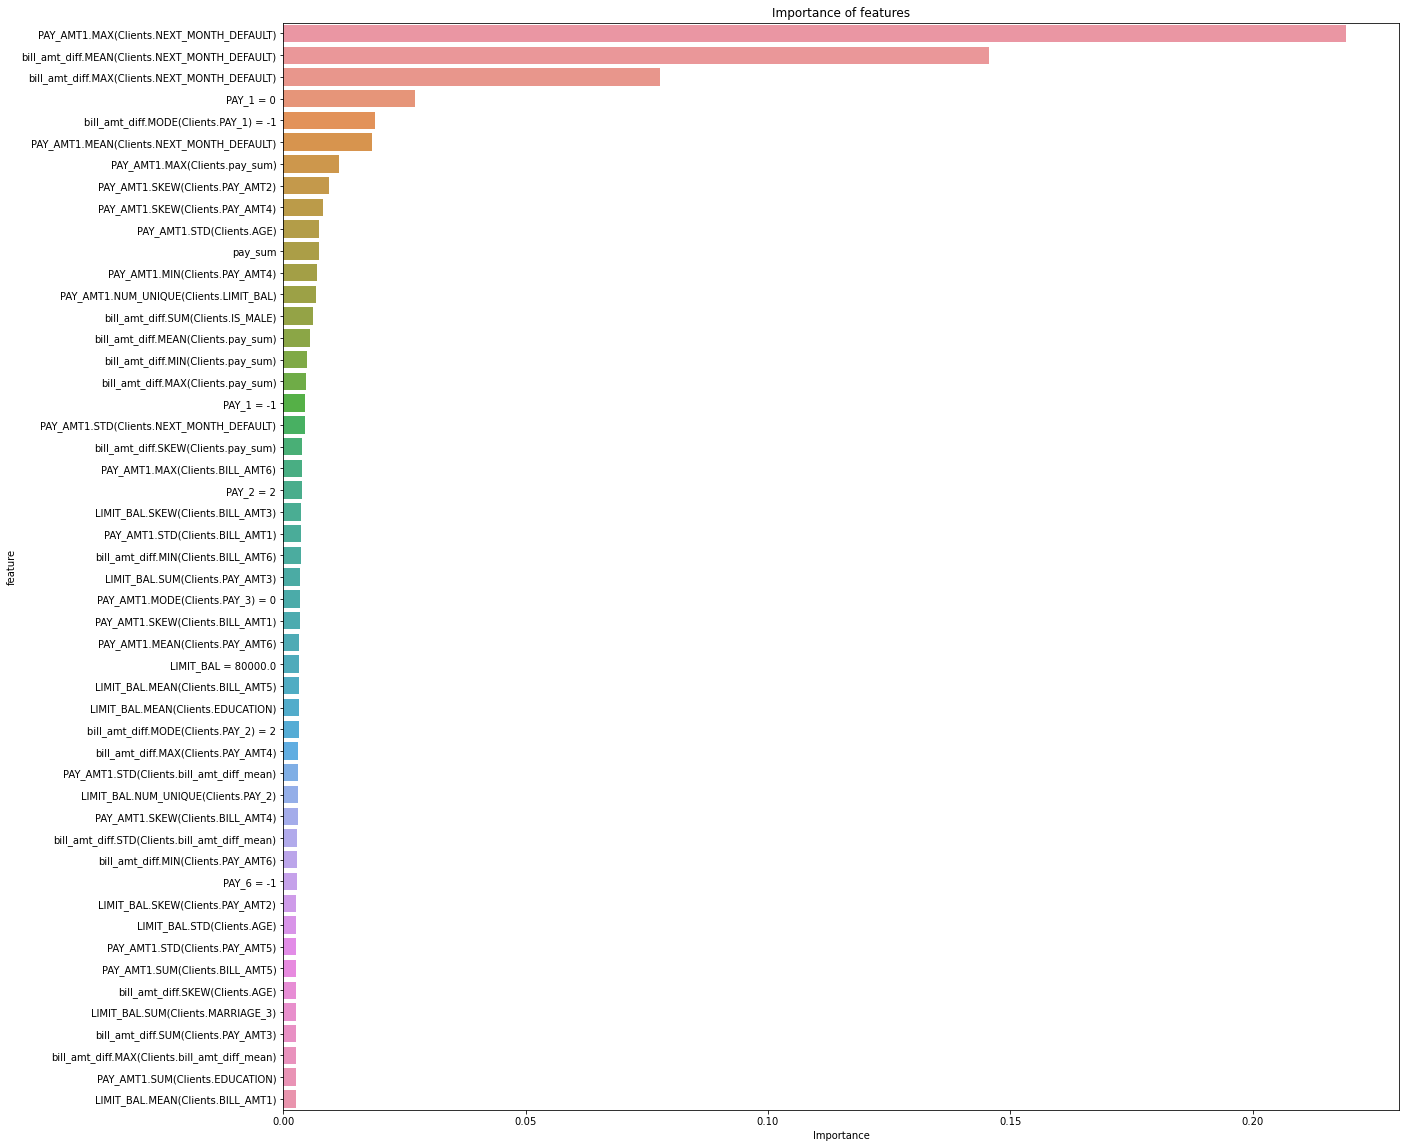

In [114]:
import seaborn as sns
feature_importances = pd.DataFrame({'feature': new_features,
                                    'importance': xgb.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)[:50]

plt.figure(figsize = (20, len(feature_importances) * 0.4))

sns.barplot(feature_importances['importance'], feature_importances['feature'])

plt.xlabel('Importance')
plt.title('Importance of features')
plt.show()

In [86]:
feature_importances

,feature,importance
456,bill_amt_diff.MEAN(Clients.NEXT_MONTH_DEFAULT),0.262020
257,PAY_AMT1.MAX(Clients.NEXT_MONTH_DEFAULT),0.090319
436,bill_amt_diff.MAX(Clients.NEXT_MONTH_DEFAULT),0.064862
277,PAY_AMT1.MEAN(Clients.NEXT_MONTH_DEFAULT),0.042219
48,pay_sum,0.034723
376,PAY_AMT1.SKEW(Clients.PAY_AMT2),0.032506
52,PAY_1 = 2,0.019705
600,bill_amt_diff.SUM(Clients.pay_sum),0.017082
354,PAY_AMT1.NUM_UNIQUE(Clients.LIMIT_BAL),0.015788
56,PAY_2 = 2,0.013598
